In [4]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [5]:
df = pd.read_csv('Data_sets/diabetes_prediction_dataset.csv')

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [9]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [10]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [11]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = dt_model.predict(X_test)

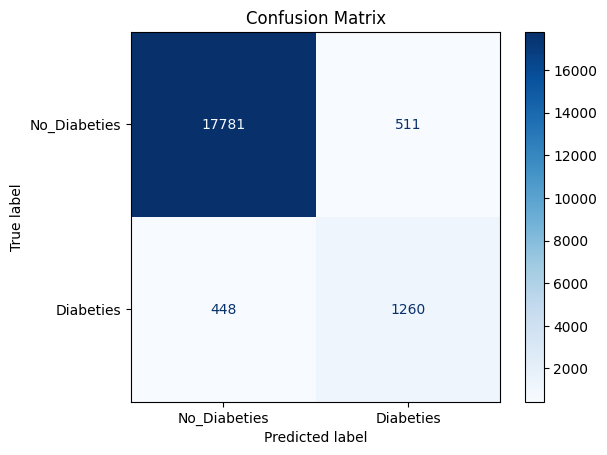

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No_Diabeties', 'Diabeties'])
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.95205


In [18]:
params = {
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10],
    'criterion':['gini','entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)
print('Best parameters found', grid.best_params_)

Best parameters found {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


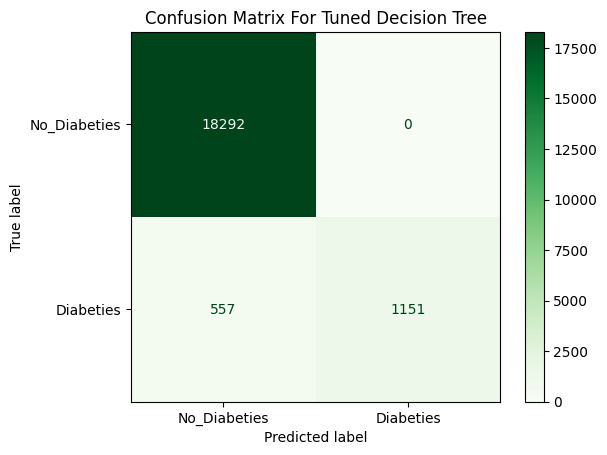

In [19]:
best_dt_model = grid.best_estimator_
y_pred_tuned = best_dt_model.predict(X_test)

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
display_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['No_Diabeties', 'Diabeties'])
display_tuned.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix For Tuned Decision Tree')
plt.show()


In [20]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(accuracy_tuned)

0.97215


In [21]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
y_pred_lr = lr_model.predict(X_test)

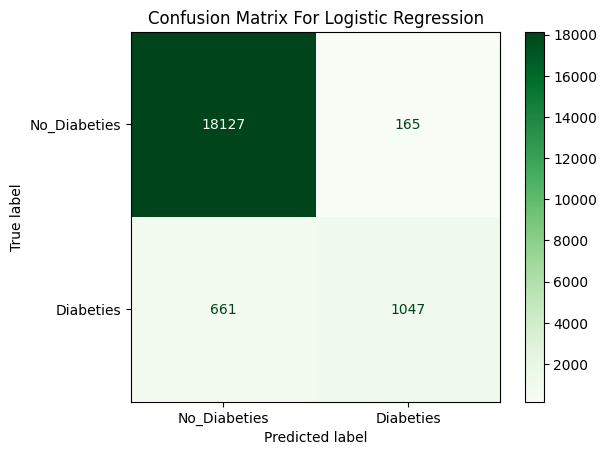

In [23]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
display_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No_Diabeties', 'Diabeties'])
display_lr.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

In [24]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)

0.9587


In [25]:
lc_params = {
    'C':[0.01, 0.1, 1, 10],
    'penalty':['l1','l2'],
    'solver':['liblinear','lbfgs']
}

lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lc_params, cv=5)
lr_grid.fit(X_train, y_train)
print('Best parameters:', lr_grid.best_params_)

d:\Diabetes_Prediction_System\env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Diabetes_Prediction_System\env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Diabetes_Prediction_System\env\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Diabetes_Prediction_System\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(s

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


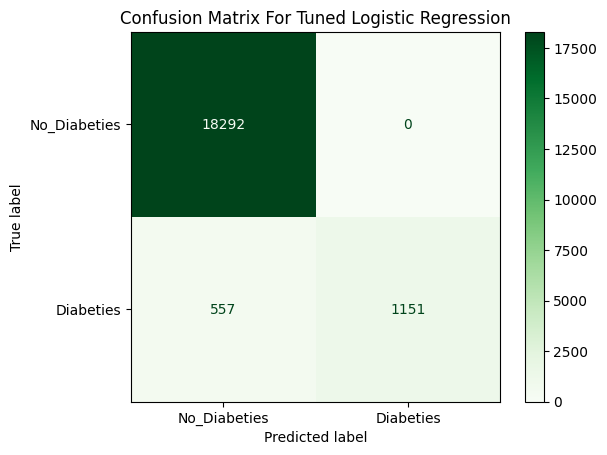

In [26]:
best_lr_model = grid.best_estimator_
y_pred_tuned = best_lr_model.predict(X_test)

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
display_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['No_Diabeties', 'Diabeties'])
display_tuned.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix For Tuned Logistic Regression')
plt.show()


In [27]:
accuracy_lr_tuned = accuracy_score(y_test, y_pred_tuned)
print(accuracy_lr_tuned)

0.97215


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred_rf=rf_model.predict(X_test)

In [31]:
print(y_pred_rf)

[0 0 0 ... 0 0 0]


In [32]:
rf_accuracy=accuracy_score(y_test,y_pred_rf)
print(rf_accuracy)

0.97065


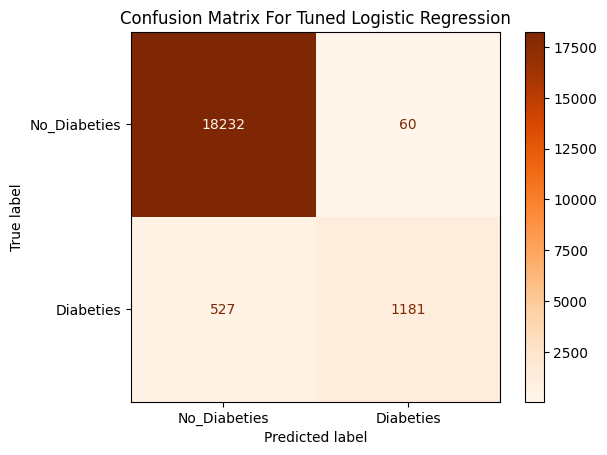

In [34]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No_Diabeties', 'Diabeties'])
display_rf.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix For Tuned Logistic Regression')
plt.show()


In [35]:
rf_params = {
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
print('Best parameters found', rf_grid.best_params_)

Best parameters found {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [36]:
best_rf=rf_grid.best_estimator_
y_pred_rf_best=best_rf.predict(X_test)
best_rf_acc=accuracy_score(y_test,y_pred_rf_best)

In [37]:
print(best_rf_acc)

0.9722
